## Importing All required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the file and quick look at the data

In [2]:
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Shape of the Data

In [3]:
print('The shape of the Data is: {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The shape of the Data is: 1000 rows and 16 columns


### Number of null values

In [4]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
data = data.rename(columns={"Series_Title": "Movies_Title"})

In [6]:
data.head(2)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [7]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [8]:
data['Gross'] = data['Gross'].astype('int64')
data['Gross'].dtype

dtype('int64')

In [9]:
data.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


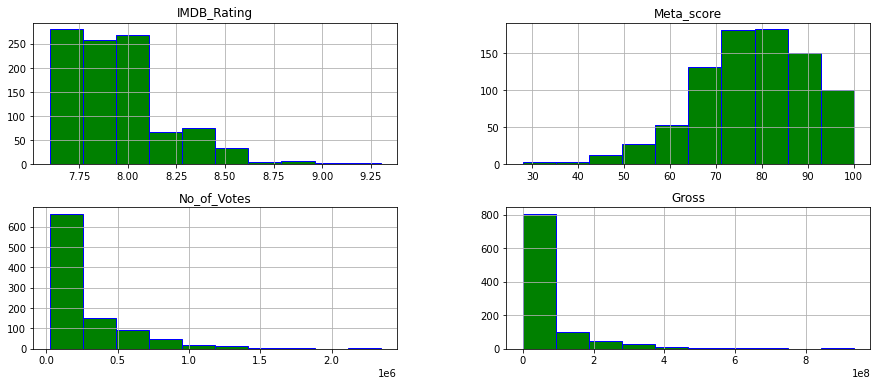

In [10]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15,6), color = 'green', edgecolor = 'blue', layout = (2,2));

In [11]:
data.describe(include = ['O'])

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,999,100,16,140,202,1000,548,660,841,891,939
top,https://m.media-amazon.com/images/M/MV5BYzYyNj...,Drishyam,2014,U,100 min,Drama,"A faded professional wrestler must retire, but...",Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,2,32,234,23,85,1,14,12,7,5,4


In [12]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

### Top Voted Movies

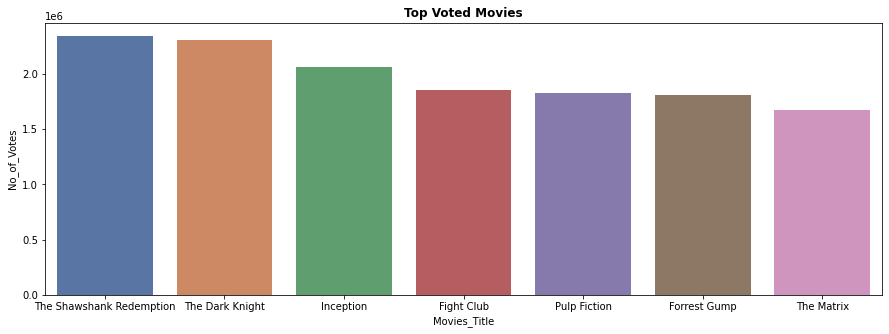

In [13]:
fig, axs = plt.subplots(figsize=(15,5))
bar = sns.barplot(x = top_voted['Movies_Title'][:7], y = top_voted['No_of_Votes'][:7], palette = 'deep')
bar.set_title('Top Voted Movies', weight = 'bold');

### Top Voted Movies Rating

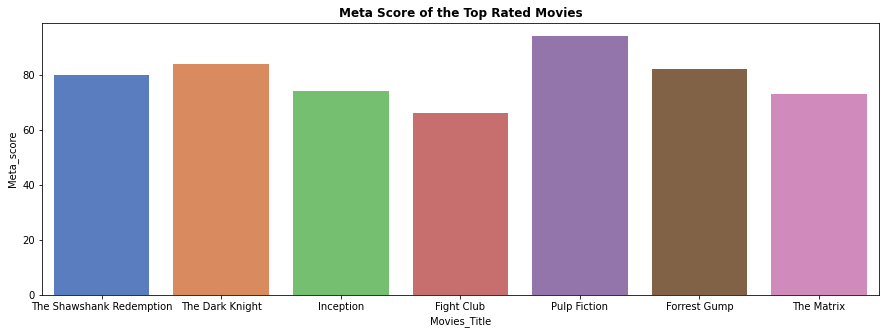

In [14]:
fig, axs = plt.subplots(figsize=(15,5))
bar = sns.barplot(x = top_voted['Movies_Title'][:7], y = top_voted['Meta_score'][:7], palette = 'muted')
bar.set_title('Meta Score of the Top Rated Movies', weight = 'bold');

In [15]:
data.Gross.head(5)

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int64

In [16]:
data.loc[data.Gross == 0].head(7)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,0
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,0
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,0
54,https://m.media-amazon.com/images/M/MV5BNWJhMD...,Ayla: The Daughter of War,2017,NaN,125 min,"Biography, Drama, History",8.4,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,0
55,https://m.media-amazon.com/images/M/MV5BY2FiMT...,Vikram Vedha,2017,UA,147 min,"Action, Crime, Drama",8.4,"Vikram, a no-nonsense police officer, accompan...",NaN,Gayatri,Pushkar,Madhavan,Vijay Sethupathi,Shraddha Srinath,28401,0


### Gross of the Top Rated Movies

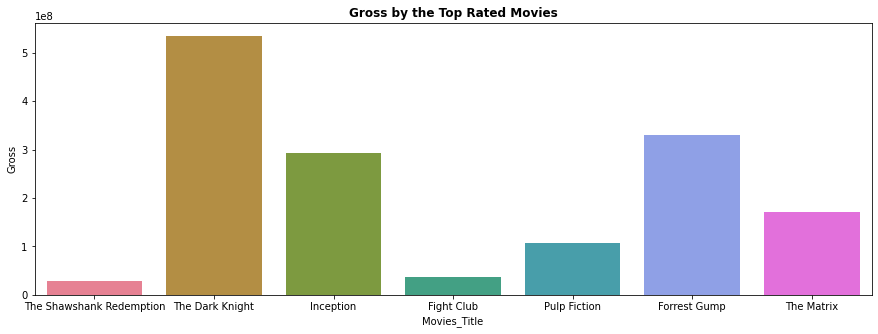

In [17]:
fig, axs = plt.subplots(figsize=(15,5))
bar = sns.barplot(x = top_voted['Movies_Title'][:7], y = top_voted['Gross'][:7], palette = 'husl')
bar.set_title('Gross by the Top Rated Movies', weight = 'bold');

### Top Movies by Gross

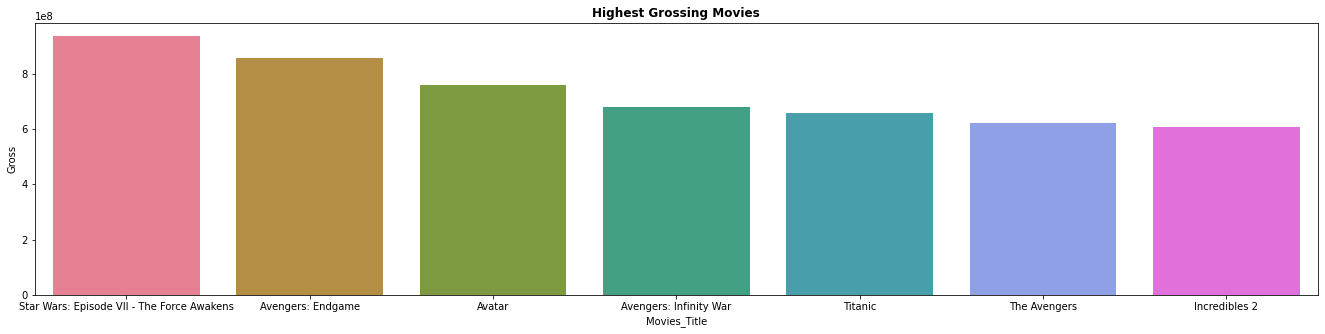

In [18]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig, axs = plt.subplots(figsize=(23,5))
bar = sns.barplot(x = highest_earning['Movies_Title'][:7], y = highest_earning['Gross'][:7], palette = 'husl')
bar.set_title('Highest Grossing Movies', weight = 'bold');

### Maximum Movies Released in-

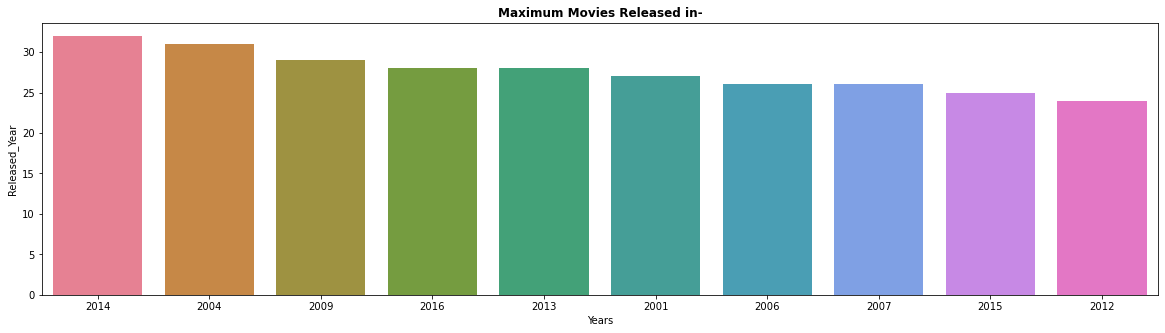

In [19]:
fig, axs = plt.subplots(figsize=(20,5))
bar = sns.barplot(x = data['Released_Year'].value_counts()[:10].index, y = data['Released_Year'].value_counts()[:10], palette = 'husl')
bar.set_title('Maximum Movies Released in-', weight = 'bold')
bar.set_xlabel('Years');

#### Mostly occurred Directors(lineplot)

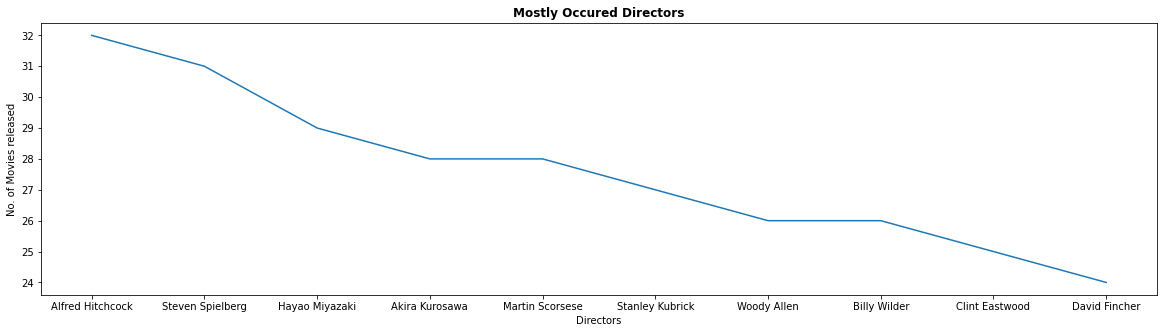

In [20]:
fig, axs = plt.subplots(figsize=(20,5))
line = sns.lineplot(x = data['Director'].value_counts()[:10].index, y = data['Released_Year'].value_counts()[:10], palette = 'husl')
line.set_title('Mostly Occured Directors', weight = 'bold')
line.set_xlabel('Directors')
line.set_ylabel('No. of Movies released');

#### Mostly Occured Directors(Barplot)

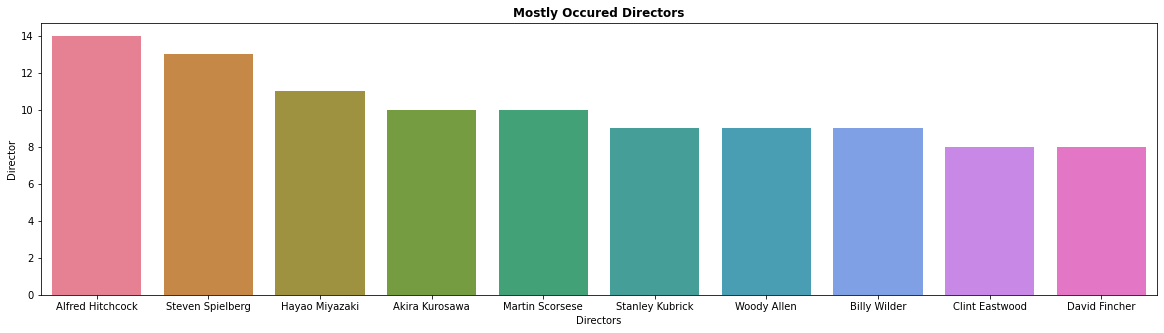

In [21]:
fig, axs = plt.subplots(figsize=(20,5))
bar = sns.barplot(x = data['Director'].value_counts()[:10].index, y = data['Director'].value_counts()[:10], palette = 'husl')
bar.set_title('Mostly Occured Directors', weight = 'bold')
bar.set_xlabel('Directors');

### Directors with respect to Gross of  the Movies

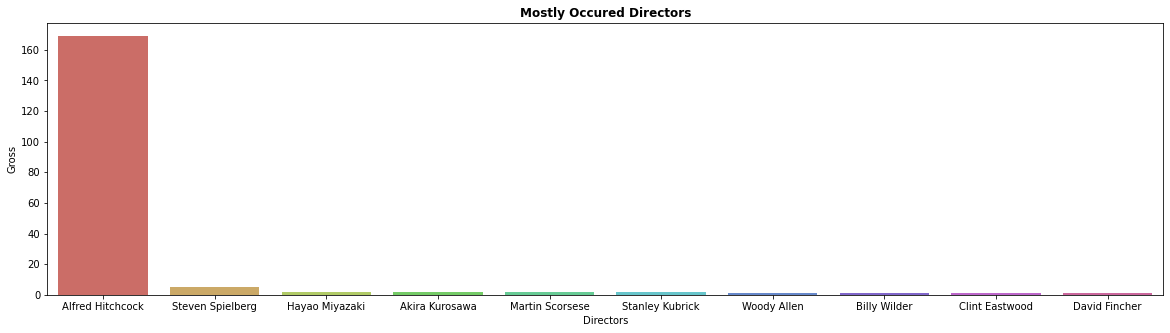

In [22]:
fig, axs = plt.subplots(figsize=(20,5))
bar = sns.barplot(x = data['Director'].value_counts()[:10].index, y = data['Gross'].value_counts()[:10], palette = 'hls')
bar.set_title('Mostly Occured Directors', weight = 'bold')
bar.set_xlabel('Directors');

#### Runtime of the Movies

In [23]:
import re
duration = []
for x in data['Runtime']:
    p = re.compile('\d+')
    j = p.findall(x)
    if len(j) == 2:
        duration.append(int(j[1]) - int(j[0])+1)
    else:
        duration.append(int(j[0])+1)
data['Duration'] = duration
data['Duration'].head()

0    143
1    176
2    153
3    203
4     97
Name: Duration, dtype: int64

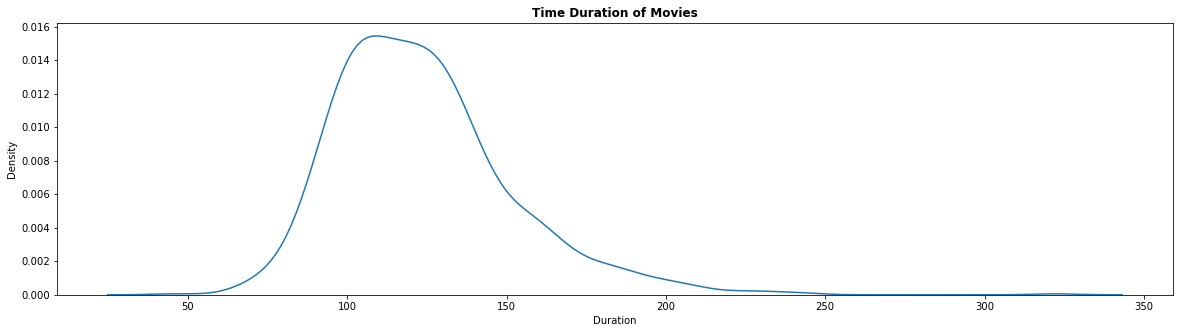

In [24]:
fig, axs = plt.subplots(figsize = (20,5))
kde = sns.kdeplot(data['Duration'])
kde.set_title('Time Duration of Movies', weight='bold');

### Stars with more occurence in Movies

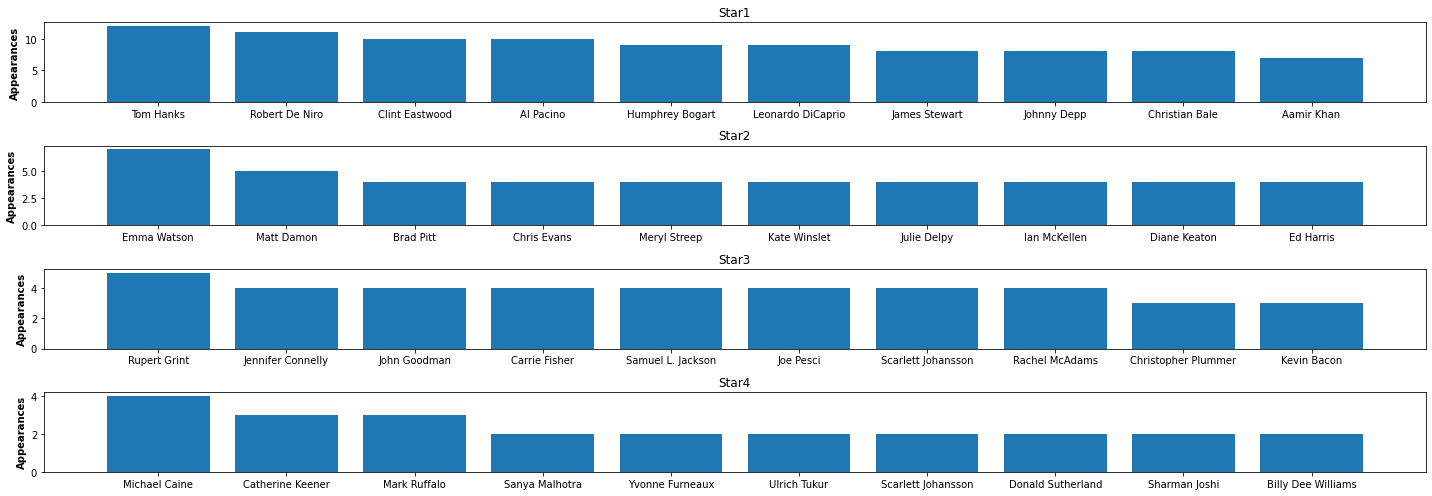

In [25]:
stars = ['Star1', 'Star2', 'Star3', 'Star4']
fig, axs=plt.subplots(4,1, figsize = (20,7))
ax = 0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index, data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel('Appearances', weight = 'bold')
    ax+=1
    plt.tight_layout()

### Appearances of Stars in Top Rated Movies

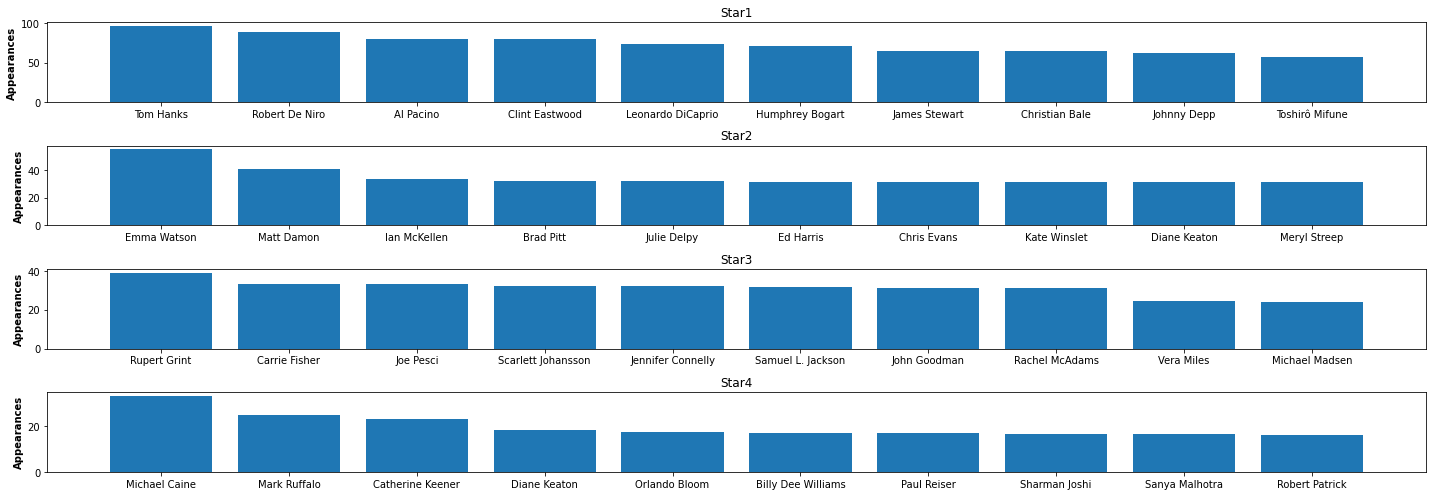

In [26]:
stars = ['Star1', 'Star2', 'Star3', 'Star4']
fig, axs=plt.subplots(4,1, figsize = (20,7))
ax=0
for x in stars:
    s = data.groupby([x]).sum().reset_index()
    d = s.sort_values(['IMDB_Rating'], ascending = False)[:10]
    axs[ax].bar(d[x], d['IMDB_Rating'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel('Appearances', weight = 'bold')
    ax+=1
    plt.tight_layout()

### Appearances of Stars in top meta_score

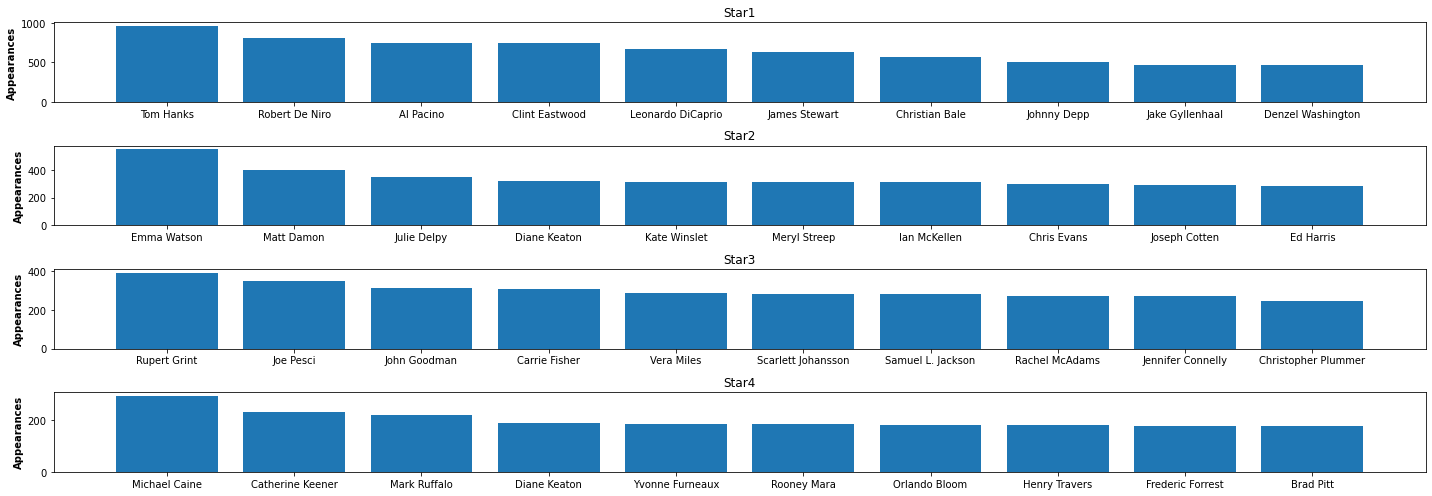

In [27]:
stars = ['Star1', 'Star2', 'Star3', 'Star4']
fig, axs=plt.subplots(4,1, figsize = (20,7))
ax=0
for x in stars:
    s = data.groupby([x]).sum().reset_index()
    d = s.sort_values(['Meta_score'], ascending = False)[:10]
    axs[ax].bar(d[x], d['Meta_score'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel('Appearances', weight = 'bold')
    ax+=1
    plt.tight_layout()

### Checking Null values in Certificate Column

In [28]:
data.Certificate.isnull().sum()

101

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


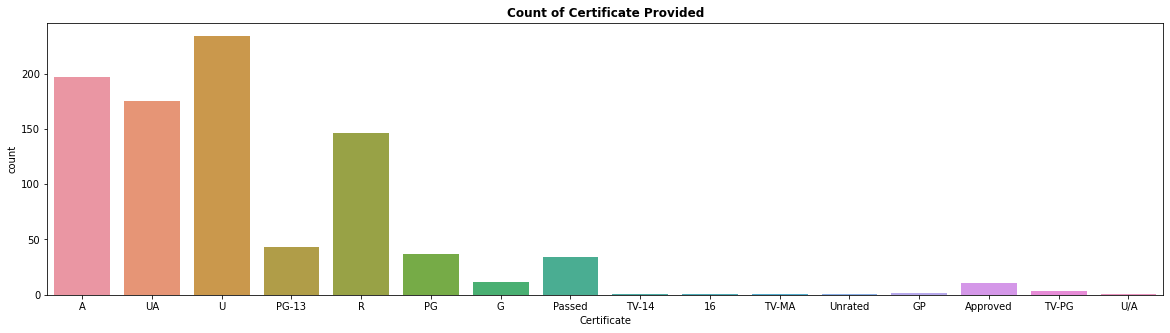

In [29]:
data['Certificate'] = data['Certificate'].fillna('Not Rated')

fig, axs = plt.subplots(figsize = (20,5))
bar = sns.countplot(data[data['Certificate']!='Not Rated']['Certificate'])
bar.set_title('Count of Certificate Provided', weight = 'bold');

### IMDb Rating Distribution

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


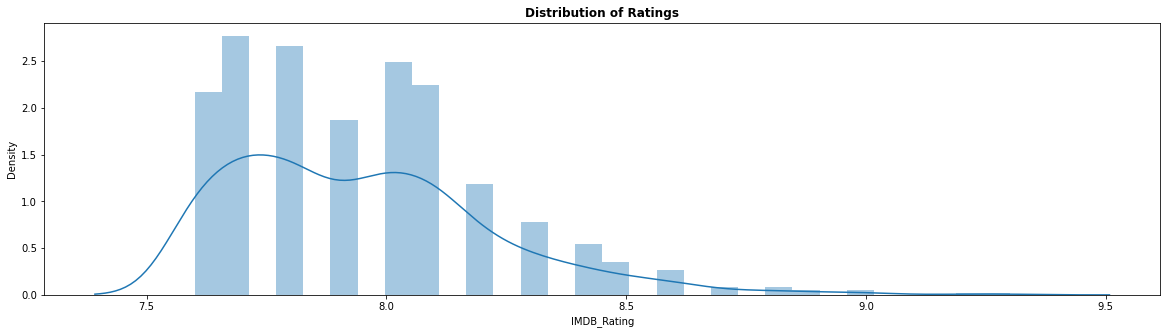

In [30]:
fig, axs = plt.subplots(figsize = (20,5))
d = sns.distplot(data['IMDB_Rating'], bins = 30)
d.set_title('Distribution of Ratings', weight = 'bold');

### Top 10 Genres

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-31-a54ec0392928>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  bars.set_ylabel('Genres', Weight = 'bold')


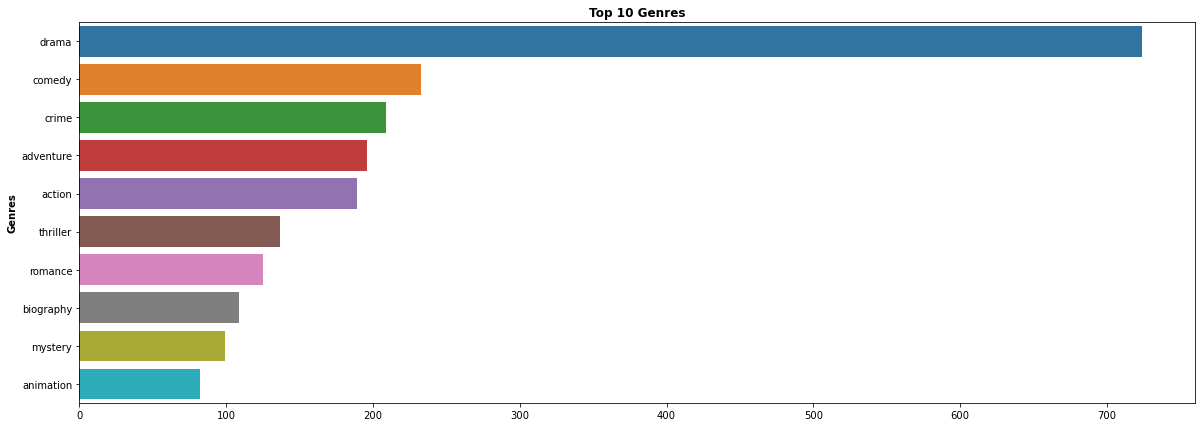

In [31]:
from collections import Counter
genres = []
for x in data['Genre']:
    for y in x.split(','):
        genres.append(y.strip().lower())
count = Counter(genres)
count = count.most_common()[:10]
x,y = map(list,zip(*count))

fig, axs = plt.subplots(figsize = (20,7))
bars = sns.barplot(y,x)
bars.set_ylabel('Genres', Weight = 'bold')
bars.set_title('Top 10 Genres', weight = 'bold');